In [85]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class KeemPlot:
    def __init__(self, path, max_value=4095, threshold=500):
        self._max_value = max_value
        self._threshold = threshold / max_value
        self.Raw_Arrays = self._gen_raw_arrays(path)
        self.flatdata, self.flatdata_ut, self.barcodes = self._get_codes(self.Raw_Arrays)

    def _gen_raw_arrays(self, path):
        image_names = os.listdir(path)
        Raw_Images = []
        for i, name in enumerate(image_names):
            Raw_Images.append(io.imread(path+name)[:,:,0])

        return Raw_Images
    
    def _interp1d(self, array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)
    
    def _get_codes(self, Raw_data):

        flatdata = []
        flatdata_ut = []
        barcodes = []

        for i, image in enumerate(Raw_data):
            arr = image.max(axis=0)
            arr = arr/self._max_value    #Normalize to values between 0 and 1.
            arr_int = self._interp1d(arr, 10000)
            flatdata_ut.append(np.copy(arr_int)) # append unthresholded arrays
            arr_int[arr_int < self._threshold] = 0  #Threshold out noise/unwanted dim signal.
            print(np.max(arr_int))
            flatdata.append(np.copy(arr_int))
            barcodes.append(np.vstack([arr_int for i in range(500)]))
            

        return flatdata, flatdata_ut, barcodes
    
    def plot_barcodes(self, barcodes, save=None):

        fig, axes = plt.subplots(len(barcodes), 1)


        for i, bar in enumerate(barcodes):
            axes[i].imshow(bar, cmap="Greys_r", vmin = 0, vmax=1.0)
            axes[i].axis("off")

        fig.tight_layout(pad=0)
        
        
        if save is not None:
            fig.savefig(save, dpi=1200)


In [47]:
path = "E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/test1/Slide_1/READY_TO_READ/"

In [86]:
dir = KeemPlot(path)

0.19169501809765832
1.0
0.31281279532104556
0.0
1.0
0.2804085292534126


In [87]:
np.sum(dir.flatdata[0] == dir.flatdata_ut[0])

125

In [88]:
np.max(dir.flatdata_ut[0])

0.19169501809765832

In [89]:
dir.flatdata_ut[1].shape

(10000,)

In [90]:
dir.flatdata[0]

array([0., 0., 0., ..., 0., 0., 0.])

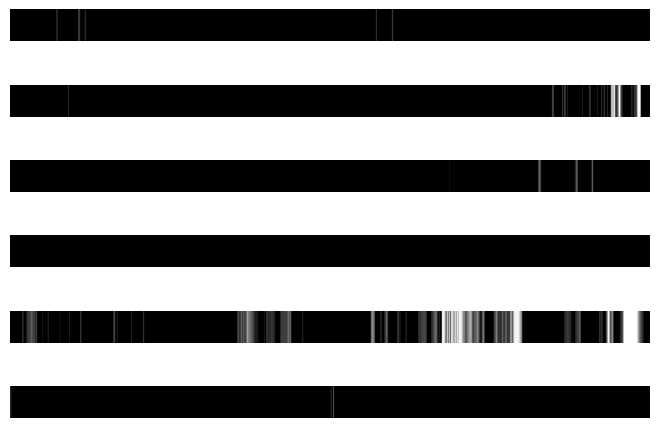

In [91]:

dir.plot_barcodes(dir.barcodes, save="./images/poster_nc.svg")

In [5]:
avg = sum(dir.flatdata) / np.sqrt(len(dir.flatdata))

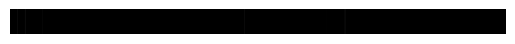

In [7]:
plt.imshow(np.vstack([avg for i in range(500)]), cmap="Greys_r", vmin = 0, vmax = 1.0)
plt.axis("off");

plt.savefig("./images/poster_ncavg.svg", dpi=1200)